In [11]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-SVM')

In [12]:
from HYP_SVM import *

In [13]:
dataset=pd.read_csv("Dataset/iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
y=np.where(y==0,-1, y)
#print("features:\n", X, "\nLabels:\n ", y)

In [14]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

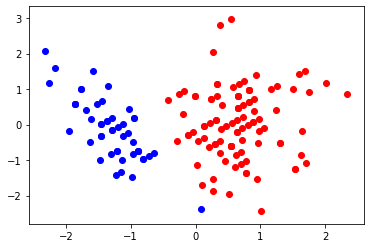

In [15]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, -1),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [16]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    #print(Y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    normalized = (Z-Z.min())/(Z.max()-Z.min())
    membership_contour = plt.contour(X, Y, normalized,
                                     levels=(.1, .3, .5, .95), colors='k')
    #print(membership_contour)
    plt.clabel(membership_contour, inline=1)

In [17]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d, y, test_size=80)

In [19]:
C_vals = [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]
sigma = [9e-2, 9e-1, 9, 9e+1, 9e+2, 9e+3, 9e+4]
parameters = {'C': C_vals, 'sigma': sigma}

model = HYP_SVM(C=100, kernel=gaussian_kernel, sigma=0.9)

clf = GridSearchCV(model, parameters, cv=5)
grid_result = clf.fit(X=xTrain, y=yTrain)

     pcost       dcost       gap    pres   dres
 0: -1.2918e+01 -4.0506e+00  2e+02  1e+01  2e-16
 1: -3.2028e+00 -1.2311e+00  2e+01  1e+00  4e-16
 2: -4.4226e-01 -1.0364e+00  8e-01  1e-02  1e-15
 3: -4.1659e-01 -4.3615e-01  2e-02  1e-17  5e-16
 4: -4.1756e-01 -4.1948e-01  2e-03  1e-17  3e-16
 5: -4.1773e-01 -4.1796e-01  2e-04  1e-17  3e-16
 6: -4.1776e-01 -4.1777e-01  9e-06  1e-17  3e-16
 7: -4.1776e-01 -4.1776e-01  1e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2918e+01 -4.0506e+00  2e+02  1e+01  2e-16
 1: -3.2028e+00 -1.2311e+00  2e+01  1e+00  4e-16
 2: -4.4226e-01 -1.0364e+00  8e-01  1e-02  1e-15
 3: -4.1659e-01 -4.3615e-01  2e-02  1e-17  5e-16
 4: -4.1756e-01 -4.1948e-01  2e-03  1e-17  3e-16
 5: -4.1773e-01 -4.1796e-01  2e-04  1e-17  3e-16
 6: -4.1776e-01 -4.1777e-01  9e-06  1e-17  3e-16
 7: -4.1776e-01 -4.1776e-01  1e-07  1e-17  4e-16
Optimal solution found.
[-0.25055296 -0.25365046 -0.25044076 -0.25064247 -0.25095706 -0.25342409

     pcost       dcost       gap    pres   dres
 0: -3.4195e+00 -2.4609e+00  2e+02  1e+01  3e-16
 1: -1.9247e+00 -1.7244e+00  1e+01  9e-01  4e-16
 2: -3.5400e-01 -1.0449e+00  8e-01  8e-03  2e-15
 3: -3.8646e-01 -4.5615e-01  7e-02  7e-04  4e-16
 4: -3.9891e-01 -4.0737e-01  9e-03  7e-05  5e-16
 5: -4.0223e-01 -4.0369e-01  1e-03  3e-06  3e-16
 6: -4.0280e-01 -4.0305e-01  3e-04  3e-07  4e-16
 7: -4.0291e-01 -4.0295e-01  4e-05  4e-08  3e-16
 8: -4.0293e-01 -4.0293e-01  2e-06  2e-09  4e-16
 9: -4.0293e-01 -4.0293e-01  3e-08  3e-11  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4195e+00 -2.4609e+00  2e+02  1e+01  3e-16
 1: -1.9247e+00 -1.7244e+00  1e+01  9e-01  4e-16
 2: -3.5400e-01 -1.0449e+00  8e-01  8e-03  2e-15
 3: -3.8646e-01 -4.5615e-01  7e-02  7e-04  4e-16
 4: -3.9891e-01 -4.0737e-01  9e-03  7e-05  5e-16
 5: -4.0223e-01 -4.0369e-01  1e-03  3e-06  3e-16
 6: -4.0280e-01 -4.0305e-01  3e-04  3e-07  4e-16
 7: -4.0291e-01 -4.0295e-01  4e-05  4e-08  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.6394e+01 -1.2115e+00  3e+02  2e+01  9e-16
 1: -6.5009e-01 -1.1678e+00  3e+00  2e-01  8e-16
 2: -4.0621e-01 -8.2796e-01  4e-01  3e-17  6e-16
 3: -4.1985e-01 -4.3440e-01  1e-02  1e-17  5e-16
 4: -4.1999e-01 -4.2015e-01  2e-04  2e-17  4e-16
 5: -4.1999e-01 -4.2000e-01  1e-05  1e-17  5e-16
 6: -4.1999e-01 -4.2000e-01  5e-06  2e-17  1e-15
 7: -4.1999e-01 -4.1999e-01  9e-07  1e-17  4e-16
 8: -4.1999e-01 -4.1999e-01  2e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6394e+01 -1.2115e+00  3e+02  2e+01  9e-16
 1: -6.5009e-01 -1.1678e+00  3e+00  2e-01  8e-16
 2: -4.0621e-01 -8.2796e-01  4e-01  3e-17  6e-16
 3: -4.1985e-01 -4.3440e-01  1e-02  1e-17  5e-16
 4: -4.1999e-01 -4.2015e-01  2e-04  2e-17  4e-16
 5: -4.1999e-01 -4.2000e-01  1e-05  1e-17  5e-16
 6: -4.1999e-01 -4.2000e-01  5e-06  2e-17  1e-15
 7: -4.1999e-01 -4.1999e-01  9e-07  1e-17  4e-16
 8: -4.1999e-01 -4.1999e-01  2e-07  1e-17  4e-1

     pcost       dcost       gap    pres   dres
 0: -2.6511e+01 -1.1735e+00  3e+02  2e+01  7e-16
 1: -6.5071e-01 -1.1679e+00  3e+00  2e-01  9e-16
 2: -4.0628e-01 -8.2812e-01  4e-01  2e-17  5e-16
 3: -4.1986e-01 -4.3437e-01  1e-02  3e-17  5e-16
 4: -4.2000e-01 -4.2014e-01  1e-04  1e-17  7e-16
 5: -4.2000e-01 -4.2000e-01  2e-06  1e-17  4e-16
 6: -4.2000e-01 -4.2000e-01  2e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6511e+01 -1.1735e+00  3e+02  2e+01  7e-16
 1: -6.5071e-01 -1.1679e+00  3e+00  2e-01  9e-16
 2: -4.0628e-01 -8.2812e-01  4e-01  2e-17  5e-16
 3: -4.1986e-01 -4.3437e-01  1e-02  3e-17  5e-16
 4: -4.2000e-01 -4.2014e-01  1e-04  1e-17  7e-16
 5: -4.2000e-01 -4.2000e-01  2e-06  1e-17  4e-16
 6: -4.2000e-01 -4.2000e-01  2e-07  1e-17  5e-16
Optimal solution found.
[-0.24999939 -0.25000023 -0.2499996  -0.25000083 -0.25000046 -0.25000048
 -0.25000034 -0.25000091 -0.25000004 -0.25000039 -0.2499996  -0.25000033
 -0.25000039 -0.24999938

     pcost       dcost       gap    pres   dres
 0: -2.6512e+01 -1.1730e+00  3e+02  2e+01  7e-16
 1: -6.5072e-01 -1.1679e+00  3e+00  2e-01  9e-16
 2: -4.0628e-01 -8.2812e-01  4e-01  2e-17  6e-16
 3: -4.1986e-01 -4.3437e-01  1e-02  1e-17  5e-16
 4: -4.2000e-01 -4.2014e-01  1e-04  2e-17  5e-16
 5: -4.2000e-01 -4.2000e-01  1e-06  1e-17  7e-16
 6: -4.2000e-01 -4.2000e-01  1e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6512e+01 -1.1730e+00  3e+02  2e+01  7e-16
 1: -6.5072e-01 -1.1679e+00  3e+00  2e-01  9e-16
 2: -4.0628e-01 -8.2812e-01  4e-01  2e-17  6e-16
 3: -4.1986e-01 -4.3437e-01  1e-02  1e-17  5e-16
 4: -4.2000e-01 -4.2014e-01  1e-04  2e-17  5e-16
 5: -4.2000e-01 -4.2000e-01  1e-06  1e-17  7e-16
 6: -4.2000e-01 -4.2000e-01  1e-08  1e-17  5e-16
Optimal solution found.
[-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25
 -0.25 -0.25]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.848

 2: -2.3591e+00 -2.9605e+00  6e-01  7e-04  3e-16
 3: -2.5073e+00 -2.6452e+00  1e-01  1e-04  2e-16
 4: -2.5480e+00 -2.5969e+00  5e-02  4e-05  2e-16
 5: -2.5646e+00 -2.5786e+00  1e-02  9e-06  2e-16
 6: -2.5698e+00 -2.5730e+00  3e-03  6e-07  2e-16
 7: -2.5713e+00 -2.5714e+00  5e-05  9e-09  2e-16
 8: -2.5714e+00 -2.5714e+00  5e-07  9e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3901e+00 -9.3538e+00  2e+02  1e+01  3e-16
 1: -2.4077e+00 -8.5385e+00  9e+00  2e-01  3e-16
 2: -2.3591e+00 -2.9605e+00  6e-01  7e-04  3e-16
 3: -2.5073e+00 -2.6452e+00  1e-01  1e-04  2e-16
 4: -2.5480e+00 -2.5969e+00  5e-02  4e-05  2e-16
 5: -2.5646e+00 -2.5786e+00  1e-02  9e-06  2e-16
 6: -2.5698e+00 -2.5730e+00  3e-03  6e-07  2e-16
 7: -2.5713e+00 -2.5714e+00  5e-05  9e-09  2e-16
 8: -2.5714e+00 -2.5714e+00  5e-07  9e-11  2e-16
Optimal solution found.
[-0.94783767 -0.88750363 -0.46357994 -1.0158621  -0.69783011  0.19560525
  0.99912178 -1.00350513 -0.46809636 -0.8520782

     pcost       dcost       gap    pres   dres
 0: -2.5925e+01 -1.1962e+01  3e+02  2e+01  8e-16
 1: -3.7108e+00 -1.1355e+01  1e+01  2e-01  8e-16
 2: -3.3684e+00 -3.9853e+00  6e-01  2e-16  5e-16
 3: -3.3988e+00 -3.4063e+00  8e-03  1e-16  8e-16
 4: -3.3993e+00 -3.4001e+00  9e-04  1e-16  6e-16
 5: -3.3994e+00 -3.3997e+00  3e-04  1e-16  5e-16
 6: -3.3995e+00 -3.3995e+00  5e-05  1e-16  3e-16
 7: -3.3995e+00 -3.3995e+00  2e-05  1e-16  2e-16
 8: -3.3995e+00 -3.3995e+00  1e-05  2e-16  3e-16
 9: -3.3995e+00 -3.3995e+00  2e-06  1e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5925e+01 -1.1962e+01  3e+02  2e+01  8e-16
 1: -3.7108e+00 -1.1355e+01  1e+01  2e-01  8e-16
 2: -3.3684e+00 -3.9853e+00  6e-01  2e-16  5e-16
 3: -3.3988e+00 -3.4063e+00  8e-03  1e-16  8e-16
 4: -3.3993e+00 -3.4001e+00  9e-04  1e-16  6e-16
 5: -3.3994e+00 -3.3997e+00  3e-04  1e-16  5e-16
 6: -3.3995e+00 -3.3995e+00  5e-05  1e-16  3e-16
 7: -3.3995e+00 -3.3995e+00  2e-05  1e-16  2e-1

     pcost       dcost       gap    pres   dres
 0: -2.8286e+01 -1.1829e+01  3e+02  2e+01  8e-16
 1: -4.0508e+00 -1.1308e+01  9e+00  1e-01  9e-16
 2: -3.9824e+00 -4.2231e+00  2e-01  1e-05  4e-16
 3: -3.9998e+00 -4.0023e+00  2e-03  1e-07  5e-16
 4: -4.0000e+00 -4.0000e+00  2e-05  1e-09  4e-16
 5: -4.0000e+00 -4.0000e+00  4e-07  2e-11  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8286e+01 -1.1829e+01  3e+02  2e+01  8e-16
 1: -4.0508e+00 -1.1308e+01  9e+00  1e-01  9e-16
 2: -3.9824e+00 -4.2231e+00  2e-01  1e-05  4e-16
 3: -3.9998e+00 -4.0023e+00  2e-03  1e-07  5e-16
 4: -4.0000e+00 -4.0000e+00  2e-05  1e-09  4e-16
 5: -4.0000e+00 -4.0000e+00  4e-07  2e-11  7e-16
Optimal solution found.
[-0.2857143  -0.28571429 -0.28571431 -0.28571433 -0.28571421 -0.28571433
 -0.2857142  -0.28571431 -0.28571423 -0.28571433 -0.28571422 -0.28571432
 -0.2857143  -0.28571423]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.9183672587621975

     pcost       dcost       gap    pres   dres
 0: -1.9087e+01 -9.0611e+01  7e+01  3e-15  3e-16
 1: -1.9636e+01 -2.3448e+01  4e+00  1e-15  3e-16
 2: -2.0265e+01 -2.0510e+01  2e-01  2e-16  1e-16
 3: -2.0321e+01 -2.0325e+01  5e-03  6e-16  2e-16
 4: -2.0322e+01 -2.0322e+01  5e-05  1e-15  1e-16
 5: -2.0322e+01 -2.0322e+01  5e-07  6e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9087e+01 -9.0611e+01  7e+01  3e-15  3e-16
 1: -1.9636e+01 -2.3448e+01  4e+00  1e-15  3e-16
 2: -2.0265e+01 -2.0510e+01  2e-01  2e-16  1e-16
 3: -2.0321e+01 -2.0325e+01  5e-03  6e-16  2e-16
 4: -2.0322e+01 -2.0322e+01  5e-05  1e-15  1e-16
 5: -2.0322e+01 -2.0322e+01  5e-07  6e-16  1e-16
Optimal solution found.
[-0.30658672 -0.28079116 -0.91376187 -0.56159525 -0.25414471 -0.91376187
 -0.22899536 -0.28895259 -0.24371836 -0.28079781  1.08623813 -0.34497185
 -0.91376187 -0.28079111]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.6387501404584037

     pcost       dcost       gap    pres   dres
 0: -3.2402e+01 -1.1182e+02  3e+02  2e+00  1e-15
 1: -2.9009e+01 -6.8220e+01  4e+01  4e-16  8e-16
 2: -3.2306e+01 -3.7161e+01  5e+00  1e-15  8e-16
 3: -3.3775e+01 -3.4901e+01  1e+00  2e-15  1e-15
 4: -3.4237e+01 -3.4482e+01  2e-01  3e-16  9e-16
 5: -3.4335e+01 -3.4406e+01  7e-02  9e-16  8e-16
 6: -3.4365e+01 -3.4377e+01  1e-02  1e-15  9e-16
 7: -3.4370e+01 -3.4371e+01  8e-04  2e-15  1e-15
 8: -3.4371e+01 -3.4371e+01  3e-05  1e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2402e+01 -1.1182e+02  3e+02  2e+00  1e-15
 1: -2.9009e+01 -6.8220e+01  4e+01  4e-16  8e-16
 2: -3.2306e+01 -3.7161e+01  5e+00  1e-15  8e-16
 3: -3.3775e+01 -3.4901e+01  1e+00  2e-15  1e-15
 4: -3.4237e+01 -3.4482e+01  2e-01  3e-16  9e-16
 5: -3.4335e+01 -3.4406e+01  7e-02  9e-16  8e-16
 6: -3.4365e+01 -3.4377e+01  1e-02  1e-15  9e-16
 7: -3.4370e+01 -3.4371e+01  8e-04  2e-15  1e-15
 8: -3.4371e+01 -3.4371e+01  3e-05  1e-15  1e-1

     pcost       dcost       gap    pres   dres
 0: -4.7072e+01 -1.2521e+02  4e+02  2e+00  1e-15
 1: -3.2742e+01 -8.0590e+01  5e+01  4e-16  1e-15
 2: -3.3842e+01 -3.4748e+01  9e-01  7e-16  7e-16
 3: -3.3920e+01 -3.4033e+01  1e-01  2e-16  7e-16
 4: -3.3943e+01 -3.3960e+01  2e-02  1e-16  7e-16
 5: -3.3949e+01 -3.3954e+01  5e-03  4e-16  7e-16
 6: -3.3952e+01 -3.3952e+01  6e-04  7e-16  7e-16
 7: -3.3952e+01 -3.3952e+01  4e-05  6e-16  7e-16
 8: -3.3952e+01 -3.3952e+01  4e-07  7e-16  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.7072e+01 -1.2521e+02  4e+02  2e+00  1e-15
 1: -3.2742e+01 -8.0590e+01  5e+01  4e-16  1e-15
 2: -3.3842e+01 -3.4748e+01  9e-01  7e-16  7e-16
 3: -3.3920e+01 -3.4033e+01  1e-01  2e-16  7e-16
 4: -3.3943e+01 -3.3960e+01  2e-02  1e-16  7e-16
 5: -3.3949e+01 -3.3954e+01  5e-03  4e-16  7e-16
 6: -3.3952e+01 -3.3952e+01  6e-04  7e-16  7e-16
 7: -3.3952e+01 -3.3952e+01  4e-05  6e-16  7e-16
 8: -3.3952e+01 -3.3952e+01  4e-07  7e-16  7e-1

     pcost       dcost       gap    pres   dres
 0: -5.2497e+01 -1.2250e+02  3e+02  2e+00  1e-15
 1: -3.9263e+01 -8.1083e+01  4e+01  3e-16  1e-15
 2: -4.1972e+01 -4.3586e+01  2e+00  3e-16  1e-15
 3: -4.1999e+01 -4.2017e+01  2e-02  2e-16  1e-15
 4: -4.1999e+01 -4.2001e+01  2e-03  1e-15  1e-15
 5: -4.1999e+01 -4.2000e+01  7e-04  6e-16  1e-15
 6: -4.1999e+01 -4.1999e+01  1e-04  7e-16  8e-16
 7: -4.1999e+01 -4.1999e+01  2e-05  2e-16  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2497e+01 -1.2250e+02  3e+02  2e+00  1e-15
 1: -3.9263e+01 -8.1083e+01  4e+01  3e-16  1e-15
 2: -4.1972e+01 -4.3586e+01  2e+00  3e-16  1e-15
 3: -4.1999e+01 -4.2017e+01  2e-02  2e-16  1e-15
 4: -4.1999e+01 -4.2001e+01  2e-03  1e-15  1e-15
 5: -4.1999e+01 -4.2000e+01  7e-04  6e-16  1e-15
 6: -4.1999e+01 -4.1999e+01  1e-04  7e-16  8e-16
 7: -4.1999e+01 -4.1999e+01  2e-05  2e-16  9e-16
Optimal solution found.
[-0.24994583 -0.25001889 -0.24996504 -0.25007272 -0.25004194 -0.25004196

     pcost       dcost       gap    pres   dres
 0: -5.2500e+01 -1.2250e+02  3e+02  2e+00  1e-15
 1: -3.9265e+01 -8.1085e+01  4e+01  2e-15  1e-15
 2: -4.1973e+01 -4.3587e+01  2e+00  2e-16  1e-15
 3: -4.2000e+01 -4.2016e+01  2e-02  2e-15  1e-15
 4: -4.2000e+01 -4.2000e+01  2e-04  2e-16  1e-15
 5: -4.2000e+01 -4.2000e+01  2e-06  2e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2500e+01 -1.2250e+02  3e+02  2e+00  1e-15
 1: -3.9265e+01 -8.1085e+01  4e+01  2e-15  1e-15
 2: -4.1973e+01 -4.3587e+01  2e+00  2e-16  1e-15
 3: -4.2000e+01 -4.2016e+01  2e-02  2e-15  1e-15
 4: -4.2000e+01 -4.2000e+01  2e-04  2e-16  1e-15
 5: -4.2000e+01 -4.2000e+01  2e-06  2e-15  1e-15
Optimal solution found.
[-0.25       -0.25       -0.25       -0.25       -0.25       -0.25
 -0.24999999 -0.25       -0.25       -0.25       -0.24999999 -0.24999999
 -0.25000001 -0.25      ]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.8482142777372744
     

     pcost       dcost       gap    pres   dres
 0:  1.3693e+02 -1.3739e+03  2e+03  2e-01  2e-15
 1:  6.2196e+01 -1.5804e+02  2e+02  1e-02  2e-15
 2:  4.5793e+00 -2.5448e+01  3e+01  2e-16  2e-15
 3: -3.3758e+00 -9.1099e+00  6e+00  5e-16  6e-16
 4: -5.7241e+00 -7.5580e+00  2e+00  6e-16  5e-16
 5: -6.1615e+00 -6.4915e+00  3e-01  4e-16  4e-16
 6: -6.2727e+00 -6.3268e+00  5e-02  7e-16  5e-16
 7: -6.2924e+00 -6.2939e+00  2e-03  5e-16  5e-16
 8: -6.2931e+00 -6.2932e+00  4e-05  2e-15  6e-16
 9: -6.2931e+00 -6.2931e+00  8e-07  2e-16  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3693e+02 -1.3739e+03  2e+03  2e-01  2e-15
 1:  6.2196e+01 -1.5804e+02  2e+02  1e-02  2e-15
 2:  4.5793e+00 -2.5448e+01  3e+01  2e-16  2e-15
 3: -3.3758e+00 -9.1099e+00  6e+00  5e-16  6e-16
 4: -5.7241e+00 -7.5580e+00  2e+00  6e-16  5e-16
 5: -6.1615e+00 -6.4915e+00  3e-01  4e-16  4e-16
 6: -6.2727e+00 -6.3268e+00  5e-02  7e-16  5e-16
 7: -6.2924e+00 -6.2939e+00  2e-03  5e-16  5e-1

     pcost       dcost       gap    pres   dres
 0:  4.9632e+01 -2.4159e+03  2e+03  6e-15  6e-15
 1: -2.2111e+01 -3.0249e+02  3e+02  1e-14  4e-15
 2: -7.5147e+01 -1.5184e+02  8e+01  4e-16  3e-15
 3: -9.3017e+01 -1.3006e+02  4e+01  1e-14  6e-15
 4: -1.0220e+02 -1.1950e+02  2e+01  5e-15  5e-15
 5: -1.0800e+02 -1.1168e+02  4e+00  4e-15  7e-15
 6: -1.0950e+02 -1.1026e+02  8e-01  5e-15  9e-15
 7: -1.0980e+02 -1.0983e+02  3e-02  1e-14  7e-15
 8: -1.0981e+02 -1.0981e+02  3e-04  4e-15  8e-15
 9: -1.0981e+02 -1.0981e+02  3e-06  6e-15  8e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.9632e+01 -2.4159e+03  2e+03  6e-15  6e-15
 1: -2.2111e+01 -3.0249e+02  3e+02  1e-14  4e-15
 2: -7.5147e+01 -1.5184e+02  8e+01  4e-16  3e-15
 3: -9.3017e+01 -1.3006e+02  4e+01  1e-14  6e-15
 4: -1.0220e+02 -1.1950e+02  2e+01  5e-15  5e-15
 5: -1.0800e+02 -1.1168e+02  4e+00  4e-15  7e-15
 6: -1.0950e+02 -1.1026e+02  8e-01  5e-15  9e-15
 7: -1.0980e+02 -1.0983e+02  3e-02  1e-14  7e-1

     pcost       dcost       gap    pres   dres
 0: -2.6041e+02 -1.8545e+03  2e+03  1e-14  6e-15
 1: -2.9253e+02 -3.9090e+02  1e+02  1e-14  6e-15
 2: -3.3945e+02 -3.4201e+02  3e+00  1e-16  6e-15
 3: -3.3989e+02 -3.4007e+02  2e-01  5e-15  6e-15
 4: -3.3994e+02 -3.3996e+02  3e-02  5e-15  6e-15
 5: -3.3995e+02 -3.3995e+02  4e-03  5e-15  8e-15
 6: -3.3995e+02 -3.3995e+02  4e-04  2e-16  8e-15
 7: -3.3995e+02 -3.3995e+02  1e-05  7e-15  7e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6041e+02 -1.8545e+03  2e+03  1e-14  6e-15
 1: -2.9253e+02 -3.9090e+02  1e+02  1e-14  6e-15
 2: -3.3945e+02 -3.4201e+02  3e+00  1e-16  6e-15
 3: -3.3989e+02 -3.4007e+02  2e-01  5e-15  6e-15
 4: -3.3994e+02 -3.3996e+02  3e-02  5e-15  6e-15
 5: -3.3995e+02 -3.3995e+02  4e-03  5e-15  8e-15
 6: -3.3995e+02 -3.3995e+02  4e-04  2e-16  8e-15
 7: -3.3995e+02 -3.3995e+02  1e-05  7e-15  7e-15
Optimal solution found.
[-0.39285104 -0.39326576 -0.39238105 -0.39225662 -0.39303078 -0.39221055

     pcost       dcost       gap    pres   dres
 0: -2.8286e+02 -1.7486e+03  1e+03  8e-15  8e-15
 1: -3.3393e+02 -4.5567e+02  1e+02  5e-15  8e-15
 2: -3.9934e+02 -4.0404e+02  5e+00  5e-15  9e-15
 3: -3.9999e+02 -4.0004e+02  5e-02  9e-15  8e-15
 4: -4.0000e+02 -4.0000e+02  5e-04  5e-15  1e-14
 5: -4.0000e+02 -4.0000e+02  2e-05  2e-16  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8286e+02 -1.7486e+03  1e+03  8e-15  8e-15
 1: -3.3393e+02 -4.5567e+02  1e+02  5e-15  8e-15
 2: -3.9934e+02 -4.0404e+02  5e+00  5e-15  9e-15
 3: -3.9999e+02 -4.0004e+02  5e-02  9e-15  8e-15
 4: -4.0000e+02 -4.0000e+02  5e-04  5e-15  1e-14
 5: -4.0000e+02 -4.0000e+02  2e-05  2e-16  1e-14
Optimal solution found.
[-0.2857143  -0.28571429 -0.28571431 -0.28571433 -0.28571421 -0.28571433
 -0.2857142  -0.28571431 -0.28571423 -0.28571433 -0.28571422 -0.28571432
 -0.2857143  -0.28571423]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.9183672591198739

     pcost       dcost       gap    pres   dres
 0:  1.5731e+04 -7.6751e+04  1e+05  3e-02  2e-14
 1:  4.1836e+03 -7.0490e+03  1e+04  2e-03  3e-14
 2:  6.0920e+02 -7.9262e+02  1e+03  1e-14  1e-14
 3:  7.4591e+01 -1.2610e+02  2e+02  5e-15  7e-15
 4:  4.2663e+00 -2.3582e+01  3e+01  2e-15  2e-15
 5: -3.5503e+00 -7.9248e+00  4e+00  1e-15  9e-16
 6: -5.4638e+00 -6.5198e+00  1e+00  1e-15  4e-16
 7: -5.8791e+00 -6.0496e+00  2e-01  1e-15  4e-16
 8: -5.9546e+00 -5.9587e+00  4e-03  1e-15  5e-16
 9: -5.9566e+00 -5.9566e+00  5e-05  2e-15  4e-16
10: -5.9566e+00 -5.9566e+00  5e-07  2e-15  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5731e+04 -7.6751e+04  1e+05  3e-02  2e-14
 1:  4.1836e+03 -7.0490e+03  1e+04  2e-03  3e-14
 2:  6.0920e+02 -7.9262e+02  1e+03  1e-14  1e-14
 3:  7.4591e+01 -1.2610e+02  2e+02  5e-15  7e-15
 4:  4.2663e+00 -2.3582e+01  3e+01  2e-15  2e-15
 5: -3.5503e+00 -7.9248e+00  4e+00  1e-15  9e-16
 6: -5.4638e+00 -6.5198e+00  1e+00  1e-15  4e-1

     pcost       dcost       gap    pres   dres
 0:  1.9583e+04 -1.7131e+05  2e+05  4e-14  5e-14
 1:  7.6250e+03 -1.5640e+04  2e+04  7e-14  4e-14
 2:  1.0418e+03 -2.1466e+03  3e+03  1e-14  2e-14
 3:  9.6906e+01 -6.1536e+02  7e+02  1e-14  2e-14
 4:  1.7537e+01 -6.1647e+02  6e+02  2e-14  2e-14
 5: -1.5026e+02 -4.4872e+02  3e+02  7e-15  2e-14
 6: -2.3362e+02 -3.7259e+02  1e+02  8e-15  2e-14
 7: -2.6931e+02 -3.2473e+02  6e+01  6e-15  4e-14
 8: -2.9178e+02 -2.9389e+02  2e+00  3e-14  4e-14
 9: -2.9259e+02 -2.9265e+02  6e-02  9e-15  4e-14
10: -2.9261e+02 -2.9261e+02  6e-04  5e-14  3e-14
11: -2.9261e+02 -2.9261e+02  6e-06  6e-15  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9583e+04 -1.7131e+05  2e+05  4e-14  5e-14
 1:  7.6250e+03 -1.5640e+04  2e+04  7e-14  4e-14
 2:  1.0418e+03 -2.1466e+03  3e+03  1e-14  2e-14
 3:  9.6906e+01 -6.1536e+02  7e+02  1e-14  2e-14
 4:  1.7537e+01 -6.1647e+02  6e+02  2e-14  2e-14
 5: -1.5026e+02 -4.4872e+02  3e+02  7e-15  2e-1

     pcost       dcost       gap    pres   dres
 0: -2.0213e+03 -7.7565e+04  8e+04  6e-14  6e-14
 1: -2.0546e+03 -4.0377e+03  2e+03  1e-14  5e-14
 2: -2.5743e+03 -3.2782e+03  7e+02  2e-16  5e-14
 3: -2.6677e+03 -3.1806e+03  5e+02  1e-13  6e-14
 4: -2.8123e+03 -3.0196e+03  2e+02  4e-14  4e-14
 5: -2.8846e+03 -2.9515e+03  7e+01  1e-14  6e-14
 6: -2.8985e+03 -2.9390e+03  4e+01  2e-16  8e-14
 7: -2.9131e+03 -2.9246e+03  1e+01  1e-13  8e-14
 8: -2.9173e+03 -2.9204e+03  3e+00  1e-13  7e-14
 9: -2.9188e+03 -2.9188e+03  4e-02  4e-14  6e-14
10: -2.9188e+03 -2.9188e+03  4e-04  1e-13  7e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0213e+03 -7.7565e+04  8e+04  6e-14  6e-14
 1: -2.0546e+03 -4.0377e+03  2e+03  1e-14  5e-14
 2: -2.5743e+03 -3.2782e+03  7e+02  2e-16  5e-14
 3: -2.6677e+03 -3.1806e+03  5e+02  1e-13  6e-14
 4: -2.8123e+03 -3.0196e+03  2e+02  4e-14  4e-14
 5: -2.8846e+03 -2.9515e+03  7e+01  1e-14  6e-14
 6: -2.8985e+03 -2.9390e+03  4e+01  2e-16  8e-1

Accuracy 0.0
Errore quadratico medio:  0.8413424537575275
     pcost       dcost       gap    pres   dres
 0: -2.6467e+03 -6.4216e+04  6e+04  6e-14  7e-14
 1: -2.7808e+03 -4.9089e+03  2e+03  9e-14  6e-14
 2: -4.1745e+03 -4.3523e+03  2e+02  2e-13  8e-14
 3: -4.1875e+03 -4.2072e+03  2e+01  1e-13  8e-14
 4: -4.1902e+03 -4.1929e+03  3e+00  9e-14  9e-14
 5: -4.1912e+03 -4.1918e+03  6e-01  1e-13  8e-14
 6: -4.1915e+03 -4.1916e+03  1e-01  4e-14  8e-14
 7: -4.1915e+03 -4.1916e+03  2e-02  1e-14  9e-14
 8: -4.1916e+03 -4.1916e+03  3e-04  3e-14  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6467e+03 -6.4216e+04  6e+04  6e-14  7e-14
 1: -2.7808e+03 -4.9089e+03  2e+03  9e-14  6e-14
 2: -4.1745e+03 -4.3523e+03  2e+02  2e-13  8e-14
 3: -4.1875e+03 -4.2072e+03  2e+01  1e-13  8e-14
 4: -4.1902e+03 -4.1929e+03  3e+00  9e-14  9e-14
 5: -4.1912e+03 -4.1918e+03  6e-01  1e-13  8e-14
 6: -4.1915e+03 -4.1916e+03  1e-01  4e-14  8e-14
 7: -4.1915e+03 -4.1916e+03  2e-02  1e

     pcost       dcost       gap    pres   dres
 0: -2.5971e+03 -6.8914e+04  7e+04  1e-13  8e-14
 1: -2.7091e+03 -4.7552e+03  2e+03  2e-16  5e-14
 2: -3.9871e+03 -4.1310e+03  1e+02  1e-13  6e-14
 3: -3.9999e+03 -4.0013e+03  1e+00  1e-13  8e-14
 4: -4.0000e+03 -4.0000e+03  2e-02  9e-14  9e-14
 5: -4.0000e+03 -4.0000e+03  2e-03  6e-14  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5971e+03 -6.8914e+04  7e+04  1e-13  8e-14
 1: -2.7091e+03 -4.7552e+03  2e+03  2e-16  5e-14
 2: -3.9871e+03 -4.1310e+03  1e+02  1e-13  6e-14
 3: -3.9999e+03 -4.0013e+03  1e+00  1e-13  8e-14
 4: -4.0000e+03 -4.0000e+03  2e-02  9e-14  9e-14
 5: -4.0000e+03 -4.0000e+03  2e-03  6e-14  8e-14
Optimal solution found.
[-0.28571445 -0.28571434 -0.28571456 -0.28571469 -0.28571356 -0.28571471
 -0.28571346 -0.28571449 -0.28571373 -0.28571475 -0.28571362 -0.28571465
 -0.28571446 -0.28571372]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.9183664783702463

     pcost       dcost       gap    pres   dres
 0:  3.0034e+06 -9.8529e+06  1e+07  2e-13  2e-13
 1:  7.0689e+05 -9.0229e+05  2e+06  8e-13  2e-13
 2:  1.0326e+05 -1.2579e+05  2e+05  1e-13  5e-14
 3:  1.4546e+04 -1.7504e+04  3e+04  3e-14  3e-14
 4:  1.9432e+03 -2.6332e+03  5e+03  1e-14  8e-15
 5:  2.1604e+02 -4.3507e+02  7e+02  1e-14  3e-15
 6: -6.2351e-01 -9.0447e+01  9e+01  8e-15  1e-15
 7: -2.1249e+01 -3.1219e+01  1e+01  7e-15  4e-16
 8: -2.2040e+01 -2.2354e+01  3e-01  2e-16  2e-16
 9: -2.2045e+01 -2.2050e+01  6e-03  4e-16  1e-16
10: -2.2045e+01 -2.2045e+01  6e-05  2e-16  1e-16
11: -2.2045e+01 -2.2045e+01  6e-07  2e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0034e+06 -9.8529e+06  1e+07  2e-13  2e-13
 1:  7.0689e+05 -9.0229e+05  2e+06  8e-13  2e-13
 2:  1.0326e+05 -1.2579e+05  2e+05  1e-13  5e-14
 3:  1.4546e+04 -1.7504e+04  3e+04  3e-14  3e-14
 4:  1.9432e+03 -2.6332e+03  5e+03  1e-14  8e-15
 5:  2.1604e+02 -4.3507e+02  7e+02  1e-14  3e-1

     pcost       dcost       gap    pres   dres
 0:  2.1351e+06 -1.2517e+07  1e+07  2e-13  6e-13
 1:  7.4132e+05 -1.1302e+06  2e+06  3e-13  3e-13
 2:  1.2595e+05 -1.8266e+05  3e+05  2e-13  2e-13
 3:  1.8264e+04 -2.6168e+04  4e+04  7e-14  9e-14
 4:  2.3352e+03 -3.6072e+03  6e+03  9e-14  4e-14
 5:  1.6649e+02 -6.4736e+02  8e+02  2e-14  2e-14
 6: -8.8468e+01 -4.9724e+02  4e+02  4e-14  2e-14
 7: -1.9145e+02 -5.3219e+02  3e+02  1e-14  4e-14
 8: -4.0171e+02 -4.2610e+02  2e+01  3e-14  6e-14
 9: -4.0843e+02 -4.0881e+02  4e-01  6e-16  5e-14
10: -4.0855e+02 -4.0855e+02  4e-03  2e-15  7e-14
11: -4.0855e+02 -4.0855e+02  4e-05  8e-14  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1351e+06 -1.2517e+07  1e+07  2e-13  6e-13
 1:  7.4132e+05 -1.1302e+06  2e+06  3e-13  3e-13
 2:  1.2595e+05 -1.8266e+05  3e+05  2e-13  2e-13
 3:  1.8264e+04 -2.6168e+04  4e+04  7e-14  9e-14
 4:  2.3352e+03 -3.6072e+03  6e+03  9e-14  4e-14
 5:  1.6649e+02 -6.4736e+02  8e+02  2e-14  2e-1

     pcost       dcost       gap    pres   dres
 0:  1.5801e+04 -5.9456e+06  6e+06  1e-13  8e-13
 1:  1.4921e+04 -1.4036e+05  2e+05  1e-16  6e-13
 2:  5.2197e+02 -5.5371e+04  6e+04  1e-13  5e-13
 3: -4.3746e+03 -3.2806e+04  3e+04  2e-13  3e-13
 4: -8.2949e+03 -1.7527e+04  9e+03  3e-13  4e-13
 5: -9.4782e+03 -1.5463e+04  6e+03  2e-13  4e-13
 6: -1.0423e+04 -1.4101e+04  4e+03  6e-14  5e-13
 7: -1.1174e+04 -1.2328e+04  1e+03  5e-13  6e-13
 8: -1.1560e+04 -1.1957e+04  4e+02  3e-13  6e-13
 9: -1.1690e+04 -1.1717e+04  3e+01  3e-13  5e-13
10: -1.1700e+04 -1.1700e+04  6e-01  3e-13  5e-13
11: -1.1700e+04 -1.1700e+04  4e-02  5e-13  5e-13
12: -1.1700e+04 -1.1700e+04  2e-03  1e-12  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5801e+04 -5.9456e+06  6e+06  1e-13  8e-13
 1:  1.4921e+04 -1.4036e+05  2e+05  1e-16  6e-13
 2:  5.2197e+02 -5.5371e+04  6e+04  1e-13  5e-13
 3: -4.3746e+03 -3.2806e+04  3e+04  2e-13  3e-13
 4: -8.2949e+03 -1.7527e+04  9e+03  3e-13  4e-1

     pcost       dcost       gap    pres   dres
 0: -2.3342e+04 -6.7962e+06  7e+06  5e-13  5e-13
 1: -2.3410e+04 -1.0153e+05  8e+04  1e-13  5e-13
 2: -2.7586e+04 -3.4636e+04  7e+03  3e-13  5e-13
 3: -3.1734e+04 -3.4449e+04  3e+03  3e-13  5e-13
 4: -3.3121e+04 -3.3851e+04  7e+02  2e-13  6e-13
 5: -3.3442e+04 -3.3564e+04  1e+02  3e-13  5e-13
 6: -3.3493e+04 -3.3536e+04  4e+01  9e-13  6e-13
 7: -3.3510e+04 -3.3525e+04  2e+01  9e-13  5e-13
 8: -3.3517e+04 -3.3520e+04  3e+00  2e-12  6e-13
 9: -3.3519e+04 -3.3519e+04  4e-02  9e-13  6e-13
10: -3.3519e+04 -3.3519e+04  4e-04  1e-13  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3342e+04 -6.7962e+06  7e+06  5e-13  5e-13
 1: -2.3410e+04 -1.0153e+05  8e+04  1e-13  5e-13
 2: -2.7586e+04 -3.4636e+04  7e+03  3e-13  5e-13
 3: -3.1734e+04 -3.4449e+04  3e+03  3e-13  5e-13
 4: -3.3121e+04 -3.3851e+04  7e+02  2e-13  6e-13
 5: -3.3442e+04 -3.3564e+04  1e+02  3e-13  5e-13
 6: -3.3493e+04 -3.3536e+04  4e+01  9e-13  6e-1

     pcost       dcost       gap    pres   dres
 0: -2.6272e+04 -5.3672e+06  5e+06  3e-13  6e-13
 1: -2.6425e+04 -9.5379e+04  7e+04  1e-12  5e-13
 2: -3.4715e+04 -4.2748e+04  8e+03  1e-12  6e-13
 3: -4.1916e+04 -4.2069e+04  2e+02  2e-12  1e-12
 4: -4.1979e+04 -4.2002e+04  2e+01  6e-13  8e-13
 5: -4.1990e+04 -4.1993e+04  3e+00  1e-13  8e-13
 6: -4.1991e+04 -4.1992e+04  5e-01  5e-13  9e-13
 7: -4.1991e+04 -4.1992e+04  1e-01  6e-13  8e-13
 8: -4.1992e+04 -4.1992e+04  5e-03  5e-13  8e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6272e+04 -5.3672e+06  5e+06  3e-13  6e-13
 1: -2.6425e+04 -9.5379e+04  7e+04  1e-12  5e-13
 2: -3.4715e+04 -4.2748e+04  8e+03  1e-12  6e-13
 3: -4.1916e+04 -4.2069e+04  2e+02  2e-12  1e-12
 4: -4.1979e+04 -4.2002e+04  2e+01  6e-13  8e-13
 5: -4.1990e+04 -4.1993e+04  3e+00  1e-13  8e-13
 6: -4.1991e+04 -4.1992e+04  5e-01  5e-13  9e-13
 7: -4.1991e+04 -4.1992e+04  1e-01  6e-13  8e-13
 8: -4.1992e+04 -4.1992e+04  5e-03  5e-13  8e-1

[-0.41193832 -0.38954364 -0.26595411 -0.389543   -0.87002147 -0.33856791
 -0.38914436 -0.38920359 -0.31806958 -0.65451091 -0.35271447 -0.42739747
 -0.36965935 -0.38954304]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.1559439195563121
     pcost       dcost       gap    pres   dres
 0:  3.0325e+08 -9.9063e+08  1e+09  9e-13  2e-12
 1:  7.0902e+07 -8.9936e+07  2e+08  5e-12  1e-12
 2:  1.0446e+07 -1.2376e+07  2e+07  1e-12  5e-13
 3:  1.5048e+06 -1.6949e+06  3e+06  5e-13  2e-13
 4:  2.1476e+05 -2.4243e+05  5e+05  2e-13  7e-14
 5:  3.0273e+04 -3.5126e+04  7e+04  8e-14  4e-14
 6:  4.1327e+03 -5.2300e+03  9e+03  1e-13  1e-14
 7:  5.0677e+02 -8.3101e+02  1e+03  2e-15  4e-15
 8:  3.2544e+01 -1.5561e+02  2e+02  8e-15  1e-15
 9: -1.9259e+01 -4.2971e+01  2e+01  3e-15  5e-16
10: -2.2370e+01 -2.3851e+01  1e+00  1e-15  2e-16
11: -2.2401e+01 -2.2434e+01  3e-02  2e-16  1e-16
12: -2.2401e+01 -2.2402e+01  3e-04  1e-15  2e-16
13: -2.2401e+01 -2.2401e+01  3e-06  4e-15  1e-

     pcost       dcost       gap    pres   dres
 0:  1.6126e+08 -6.9646e+08  9e+08  8e-03  3e-12
 1:  3.8179e+07 -6.6097e+07  1e+08  6e-04  4e-12
 2:  5.8038e+06 -6.7837e+06  1e+07  1e-06  1e-12
 3:  8.3618e+05 -9.4840e+05  2e+06  7e-13  7e-13
 4:  1.1965e+05 -1.3409e+05  3e+05  1e-13  2e-13
 5:  1.6993e+04 -1.9294e+04  4e+04  4e-15  9e-14
 6:  2.3720e+03 -2.8233e+03  5e+03  2e-16  3e-14
 7:  3.1429e+02 -4.2924e+02  7e+02  5e-15  1e-14
 8:  3.3688e+01 -7.2005e+01  1e+02  5e-15  5e-15
 9: -1.4843e+00 -1.5679e+01  1e+01  2e-15  2e-15
10: -5.3258e+00 -8.5757e+00  3e+00  8e-16  7e-16
11: -6.6419e+00 -7.3839e+00  7e-01  3e-16  7e-16
12: -6.9985e+00 -7.1210e+00  1e-01  3e-16  5e-16
13: -7.0493e+00 -7.0529e+00  4e-03  1e-15  5e-16
14: -7.0513e+00 -7.0513e+00  8e-05  1e-15  5e-16
15: -7.0513e+00 -7.0513e+00  8e-07  1e-15  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6126e+08 -6.9646e+08  9e+08  8e-03  3e-12
 1:  3.8179e+07 -6.6097e+07  1e+08  6e-04  4e-1

     pcost       dcost       gap    pres   dres
 0:  2.2214e+08 -1.6563e+09  2e+09  2e-12  6e-12
 1:  8.5557e+07 -1.4004e+08  2e+08  5e-13  4e-12
 2:  1.5082e+07 -2.1196e+07  4e+07  2e-12  3e-12
 3:  2.3180e+06 -3.3598e+06  6e+06  2e-13  1e-12
 4:  3.3475e+05 -3.8792e+05  7e+05  7e-13  6e-13
 5:  4.7097e+04 -5.6461e+04  1e+05  6e-14  2e-13
 6:  6.3036e+03 -8.4267e+03  1e+04  1e-13  6e-14
 7:  6.8329e+02 -1.3933e+03  2e+03  5e-14  4e-14
 8:  5.5806e+01 -5.6302e+02  6e+02  1e-14  2e-14
 9: -1.4087e+02 -6.8400e+02  5e+02  2e-13  6e-14
10: -4.4113e+02 -5.1337e+02  7e+01  3e-13  8e-14
11: -4.6966e+02 -4.7179e+02  2e+00  1e-13  1e-13
12: -4.7061e+02 -4.7063e+02  2e-02  1e-13  9e-14
13: -4.7062e+02 -4.7062e+02  2e-04  2e-13  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2214e+08 -1.6563e+09  2e+09  2e-12  6e-12
 1:  8.5557e+07 -1.4004e+08  2e+08  5e-13  4e-12
 2:  1.5082e+07 -2.1196e+07  4e+07  2e-12  3e-12
 3:  2.3180e+06 -3.3598e+06  6e+06  2e-13  1e-1

     pcost       dcost       gap    pres   dres
 0: -2.2321e+05 -5.2608e+08  5e+08  7e-12  6e-12
 1: -2.2329e+05 -5.6371e+06  5e+06  2e-12  5e-12
 2: -2.3044e+05 -4.3266e+05  2e+05  9e-12  8e-12
 3: -2.6926e+05 -4.1923e+05  1e+05  5e-12  8e-12
 4: -2.7054e+05 -4.1563e+05  1e+05  5e-12  1e-11
 5: -3.0819e+05 -3.8742e+05  8e+04  8e-16  1e-11
 6: -3.3437e+05 -3.5022e+05  2e+04  7e-12  1e-11
 7: -3.4072e+05 -3.4360e+05  3e+03  2e-11  1e-11
 8: -3.4198e+05 -3.4242e+05  4e+02  2e-16  1e-11
 9: -3.4218e+05 -3.4223e+05  5e+01  7e-12  1e-11
10: -3.4220e+05 -3.4220e+05  5e-01  4e-12  1e-11
11: -3.4220e+05 -3.4220e+05  5e-03  5e-12  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2321e+05 -5.2608e+08  5e+08  7e-12  6e-12
 1: -2.2329e+05 -5.6371e+06  5e+06  2e-12  5e-12
 2: -2.3044e+05 -4.3266e+05  2e+05  9e-12  8e-12
 3: -2.6926e+05 -4.1923e+05  1e+05  5e-12  8e-12
 4: -2.7054e+05 -4.1563e+05  1e+05  5e-12  1e-11
 5: -3.0819e+05 -3.8742e+05  8e+04  8e-16  1e-1

     pcost       dcost       gap    pres   dres
 0: -2.6213e+05 -5.2617e+08  5e+08  2e-12  8e-12
 1: -2.6229e+05 -5.6773e+06  5e+06  3e-12  6e-12
 2: -2.7650e+05 -4.7236e+05  2e+05  4e-12  6e-12
 3: -4.1755e+05 -4.3106e+05  1e+04  7e-12  8e-12
 4: -4.1889e+05 -4.2016e+05  1e+03  2e-11  8e-12
 5: -4.1907e+05 -4.1961e+05  5e+02  9e-12  9e-12
 6: -4.1915e+05 -4.1937e+05  2e+02  1e-11  8e-12
 7: -4.1919e+05 -4.1927e+05  8e+01  2e-12  8e-12
 8: -4.1921e+05 -4.1924e+05  3e+01  7e-12  8e-12
 9: -4.1922e+05 -4.1923e+05  8e+00  2e-11  1e-11
10: -4.1922e+05 -4.1922e+05  3e+00  1e-11  9e-12
11: -4.1922e+05 -4.1922e+05  2e-01  4e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6213e+05 -5.2617e+08  5e+08  2e-12  8e-12
 1: -2.6229e+05 -5.6773e+06  5e+06  3e-12  6e-12
 2: -2.7650e+05 -4.7236e+05  2e+05  4e-12  6e-12
 3: -4.1755e+05 -4.3106e+05  1e+04  7e-12  8e-12
 4: -4.1889e+05 -4.2016e+05  1e+03  2e-11  8e-12
 5: -4.1907e+05 -4.1961e+05  5e+02  9e-12  9e-1

     pcost       dcost       gap    pres   dres
 0: -2.5716e+05 -5.7261e+08  6e+08  5e-12  7e-12
 1: -2.5729e+05 -6.1222e+06  6e+06  1e-11  5e-12
 2: -2.6907e+05 -4.5737e+05  2e+05  8e-12  6e-12
 3: -3.9868e+05 -4.0968e+05  1e+04  5e-12  1e-11
 4: -3.9997e+05 -4.0011e+05  1e+02  2e-12  9e-12
 5: -3.9999e+05 -4.0000e+05  1e+01  2e-16  8e-12
 6: -3.9999e+05 -4.0000e+05  7e+00  2e-11  9e-12
 7: -3.9999e+05 -3.9999e+05  2e+00  2e-11  8e-12
 8: -3.9999e+05 -3.9999e+05  8e-01  2e-11  8e-12
 9: -3.9999e+05 -3.9999e+05  2e-01  5e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5716e+05 -5.7261e+08  6e+08  5e-12  7e-12
 1: -2.5729e+05 -6.1222e+06  6e+06  1e-11  5e-12
 2: -2.6907e+05 -4.5737e+05  2e+05  8e-12  6e-12
 3: -3.9868e+05 -4.0968e+05  1e+04  5e-12  1e-11
 4: -3.9997e+05 -4.0011e+05  1e+02  2e-12  9e-12
 5: -3.9999e+05 -4.0000e+05  1e+01  2e-16  8e-12
 6: -3.9999e+05 -4.0000e+05  7e+00  2e-11  9e-12
 7: -3.9999e+05 -3.9999e+05  2e+00  2e-11  8e-1

In [11]:
#clf.score(xTest, yTest)
clf.best_params_
best_params = clf.best_params_
best_C = best_params['C']
best_sigma = best_params['sigma']
#(best_C, best_sigma)

best_model = HYP_SVM(C=best_C, kernel=gaussian_kernel, sigma=best_sigma)  
            
best_model.fit(xTrain, yTrain)
#best_model.score(X_test, y_test)  

     pcost       dcost       gap    pres   dres
 0: -1.3256e+01 -4.6413e+00  3e+02  2e+01  2e-16
 1: -3.5189e+00 -1.5280e+00  2e+01  1e+00  4e-16
 2: -4.6288e-01 -1.2673e+00  1e+00  3e-02  1e-15
 3: -3.9526e-01 -4.7400e-01  8e-02  3e-17  1e-15
 4: -3.9771e-01 -4.0017e-01  2e-03  1e-17  3e-16
 5: -3.9790e-01 -3.9811e-01  2e-04  2e-17  3e-16
 6: -3.9793e-01 -3.9794e-01  1e-05  1e-17  3e-16
 7: -3.9793e-01 -3.9793e-01  2e-07  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3256e+01 -4.6413e+00  3e+02  2e+01  2e-16
 1: -3.5189e+00 -1.5280e+00  2e+01  1e+00  4e-16
 2: -4.6288e-01 -1.2673e+00  1e+00  3e-02  1e-15
 3: -3.9526e-01 -4.7400e-01  8e-02  3e-17  1e-15
 4: -3.9771e-01 -4.0017e-01  2e-03  1e-17  3e-16
 5: -3.9790e-01 -3.9811e-01  2e-04  2e-17  3e-16
 6: -3.9793e-01 -3.9794e-01  1e-05  1e-17  3e-16
 7: -3.9793e-01 -3.9793e-01  2e-07  1e-17  3e-16
Optimal solution found.


HYP_SVM(C=0.01, sigma=0.09)

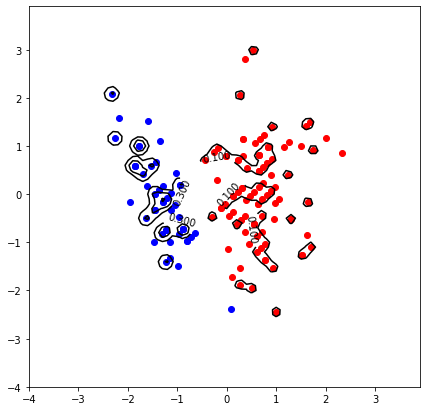

In [12]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(clf.predict)
plt.show()

In [13]:

#gr_dataset()
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#print(Y)
zs = np.array([clf.predict(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
normalized = (Z-Z.min())/(Z.max()-Z.min())
#gr_membership_contour(clf.predict)

#plt.show()

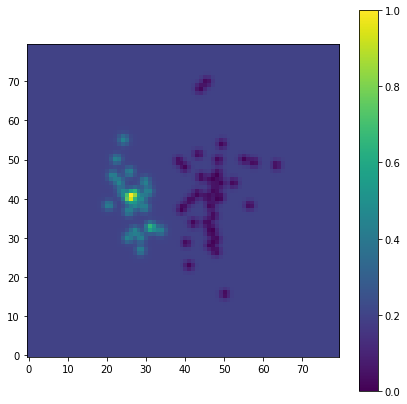

In [27]:
plt.figure(figsize=(7,7))
plt.imshow(normalized)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()